In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sb
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df = pd.read_pickle("features.pkl")
df
ac = pd.read_pickle("target.pkl")
ac
ac.columns = ['actual0']

new_df = df.join(ac)
new_df

0         1         2
2019-01-08 00:00:00+00:00  2.778776  2.795029  2.550405
2019-01-08 00:30:00+00:00  2.795336  2.778668  2.550405
2019-01-08 01:00:00+00:00  2.806959   2.76162  2.550405
2019-01-08 01:30:00+00:00  2.810723  2.762358   2.55257
2019-01-08 02:00:00+00:00  2.814365  2.775047  2.554735
...                             ...       ...       ...
2019-10-30 21:30:00+00:00  2.890639  3.014153  2.977999
2019-10-30 22:00:00+00:00  2.868277  3.010624  2.962844
2019-10-30 22:30:00+00:00  2.855856  3.001157  2.941193
2019-10-30 23:00:00+00:00  2.747903  2.638322  2.560148
2019-10-30 23:30:00+00:00  2.725645   2.61433  2.523343

[14208 rows x 3 columns]

0
2019-01-08 00:00:00+00:00  2.857432
2019-01-08 00:30:00+00:00  2.868542
2019-01-08 01:00:00+00:00  2.832536
2019-01-08 01:30:00+00:00  2.874722
2019-01-08 02:00:00+00:00  2.874747
...                             ...
2019-10-30 21:30:00+00:00  2.892960
2019-10-30 22:00:00+00:00  2.887829
2019-10-30 22:30:00+00:00  2.837730
2019-10-30 23:00:00+00:00  2.865553
2019-10-30 23:30:00+00:00  2.767785

[14208 rows x 1 columns]

0         1         2   actual0
2019-01-08 00:00:00+00:00  2.778776  2.795029  2.550405  2.857432
2019-01-08 00:30:00+00:00  2.795336  2.778668  2.550405  2.868542
2019-01-08 01:00:00+00:00  2.806959   2.76162  2.550405  2.832536
2019-01-08 01:30:00+00:00  2.810723  2.762358   2.55257  2.874722
2019-01-08 02:00:00+00:00  2.814365  2.775047  2.554735  2.874747
...                             ...       ...       ...       ...
2019-10-30 21:30:00+00:00  2.890639  3.014153  2.977999  2.892960
2019-10-30 22:00:00+00:00  2.868277  3.010624  2.962844  2.887829
2019-10-30 22:30:00+00:00  2.855856  3.001157  2.941193  2.837730
2019-10-30 23:00:00+00:00  2.747903  2.638322  2.560148  2.865553
2019-10-30 23:30:00+00:00  2.725645   2.61433  2.523343  2.767785

[14208 rows x 4 columns]

In [4]:
print(type(new_df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14208 entries, 2019-01-08 00:00:00+00:00 to 2019-10-30 23:30:00+00:00
Freq: <pandas._libs.properties.CachedProperty object at 0x00000259D1593F00>
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        14122 non-null  object 
 1   1        14122 non-null  object 
 2   2        14122 non-null  object 
 3   actual0  14208 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.0+ MB


In [6]:
#spot number of missing data
new_df.isnull().sum()

0          86
1          86
2          86
actual0     0
dtype: int64

In [7]:
#convert series to numeric
forec0 = pd.to_numeric(df[0])
forec1 = pd.to_numeric(df[1])
forec2 = pd.to_numeric(df[2])

In [8]:
#replace missing values with interpolation
forec0 = forec0.fillna(forec0.interpolate())
forec1 = forec1.fillna(forec1.interpolate())
forec2 = forec2.fillna(forec2.interpolate())

In [9]:
#check number of missing data is now zero
forec0.isnull().sum()
forec1.isnull().sum()
forec2.isnull().sum()

0

0

0

count    14208.000000
mean         1.470015
std          1.001470
min         -0.006671
25%          0.589262
50%          1.333488
75%          2.309587
max          4.980764
Name: 0, dtype: float64

count    14208.000000
mean         1.381522
std          1.055863
min          0.000000
25%          0.440521
50%          1.248717
75%          2.246916
max          4.729050
Name: 1, dtype: float64

count    14208.000000
mean         1.557999
std          1.000449
min          0.035723
25%          0.679819
50%          1.431085
75%          2.376121
max          4.343178
Name: 2, dtype: float64

count    14208.000000
mean         1.478365
std          1.000035
min         -0.029981
25%          0.587263
50%          1.351276
75%          2.355788
max          3.773450
Name: actual0, dtype: float64

(array([3.002e+03, 2.751e+03, 2.004e+03, 1.806e+03, 1.653e+03, 2.033e+03,
        6.360e+02, 3.140e+02, 7.000e+00, 2.000e+00]),
 array([-0.00667108,  0.49207245,  0.99081598,  1.48955951,  1.98830303,
         2.48704656,  2.98579009,  3.48453362,  3.98327714,  4.48202067,
         4.9807642 ]),
 <BarContainer object of 10 artists>)

(array([3728., 2274., 1647., 1811., 1588., 1620., 1029.,  396.,   87.,
          28.]),
 array([0.        , 0.47290497, 0.94580994, 1.41871491, 1.89161988,
        2.36452485, 2.83742982, 3.3103348 , 3.78323977, 4.25614474,
        4.72904971]),
 <BarContainer object of 10 artists>)

(array([2256., 2542., 1880., 1767., 1521., 1616., 1403.,  831.,  337.,
          55.]),
 array([0.035723  , 0.4664685 , 0.897214  , 1.3279595 , 1.758705  ,
        2.18945051, 2.62019601, 3.05094151, 3.48168701, 3.91243251,
        4.34317802]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'MWh')

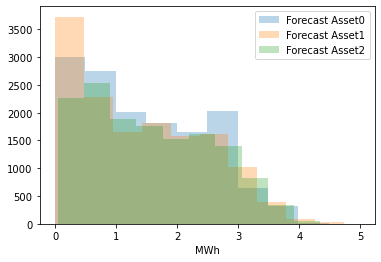

In [10]:
#descriptive statistics
forec0.describe()
forec1.describe()
forec2.describe()
new_df["actual0"].describe()

plt.hist(forec0, alpha=0.3, label='Forecast Asset0')
plt.hist(forec1,  alpha=0.3, label='Forecast Asset1')
plt.hist(forec2, alpha=0.3, label='Forecast Asset2')
plt.legend(fontsize=10)
plt.xlabel("MWh", fontsize=10)
plt.rcParams["figure.figsize"] = (10,5)

Text(0, 0.5, 'MWh')

Text(0.5, 1.0, 'Forecast Asset0')

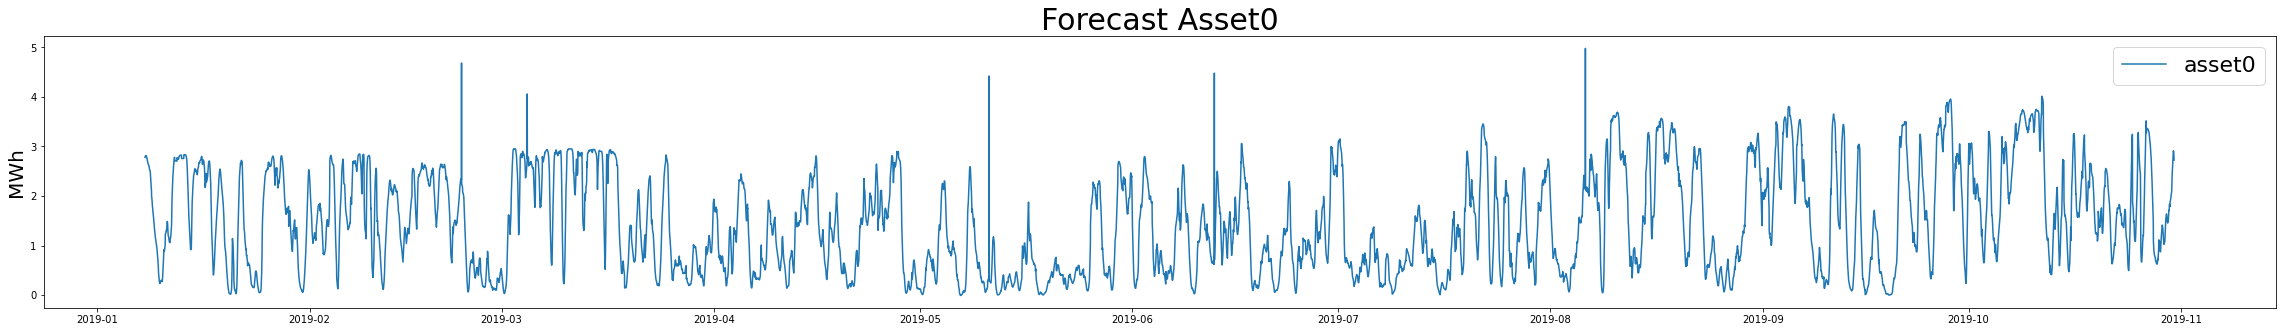

Text(0, 0.5, 'MWh')

Text(0.5, 1.0, 'Forecast Asset1')

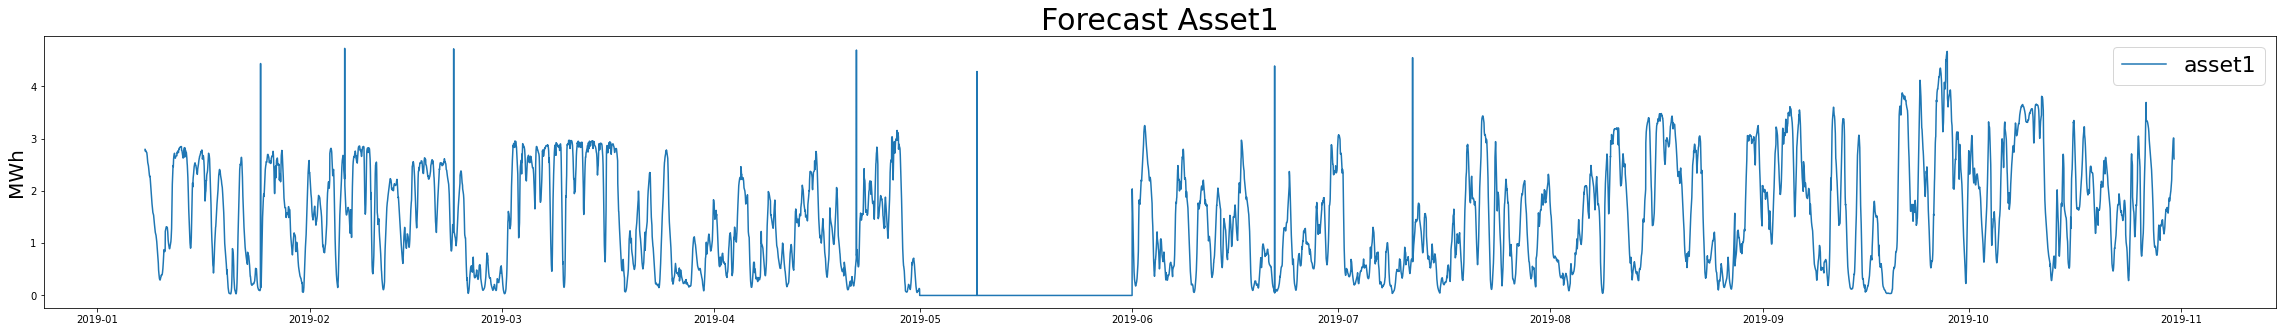

Text(0, 0.5, 'MWh')

Text(0.5, 1.0, 'Forecast Asset2')

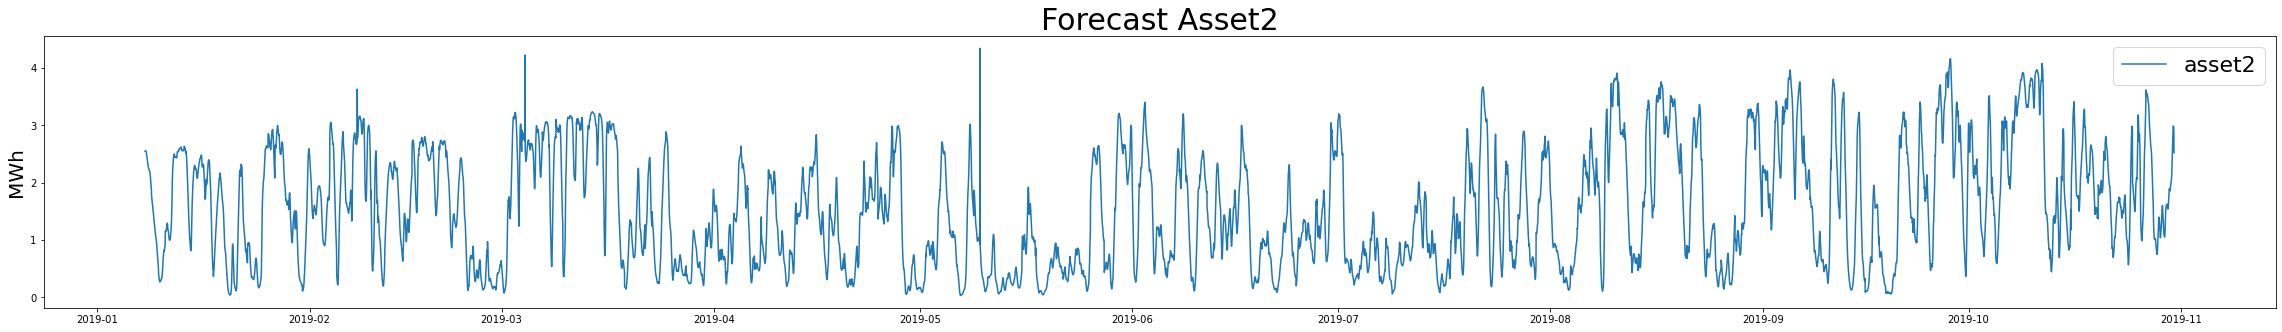

In [31]:
#plot variables to spot outliers
plt.plot(forec0, label="asset0")
plt.rcParams["figure.figsize"] = (40,5)
plt.ylabel("MWh", fontsize=20)
plt.legend(fontsize=22)
plt.title('Forecast Asset0', fontsize=30)
plt.show()

plt.plot(forec1, label="asset1")
plt.rcParams["figure.figsize"] = (40,5)
plt.ylabel("MWh", fontsize=20)
plt.legend(fontsize=22)
plt.title('Forecast Asset1', fontsize=30)
plt.show()

plt.plot(forec2, label="asset2")
plt.rcParams["figure.figsize"] = (40,5)
plt.ylabel("MWh", fontsize=20)
plt.legend(fontsize=22)
plt.title('Forecast Asset2', fontsize=30)
plt.show()

Text(0, 0.5, 'MWh')

Text(0.5, 1.0, 'Forecast Asset0')

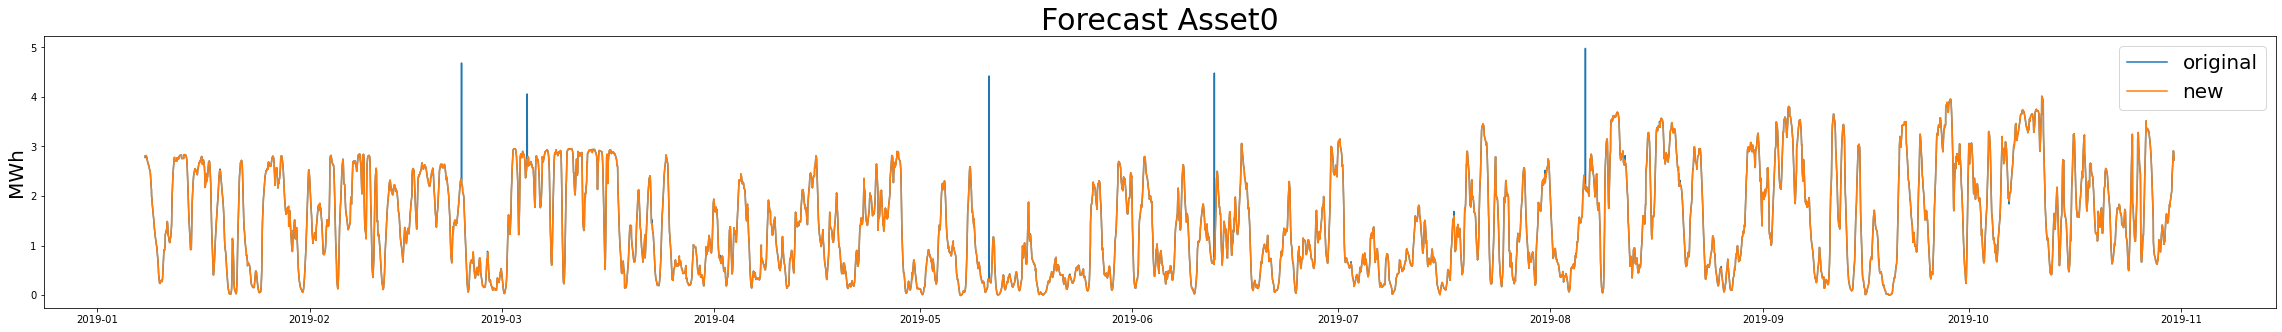

Text(0, 0.5, 'MWh')

Text(0.5, 1.0, 'Forecast Asset1')

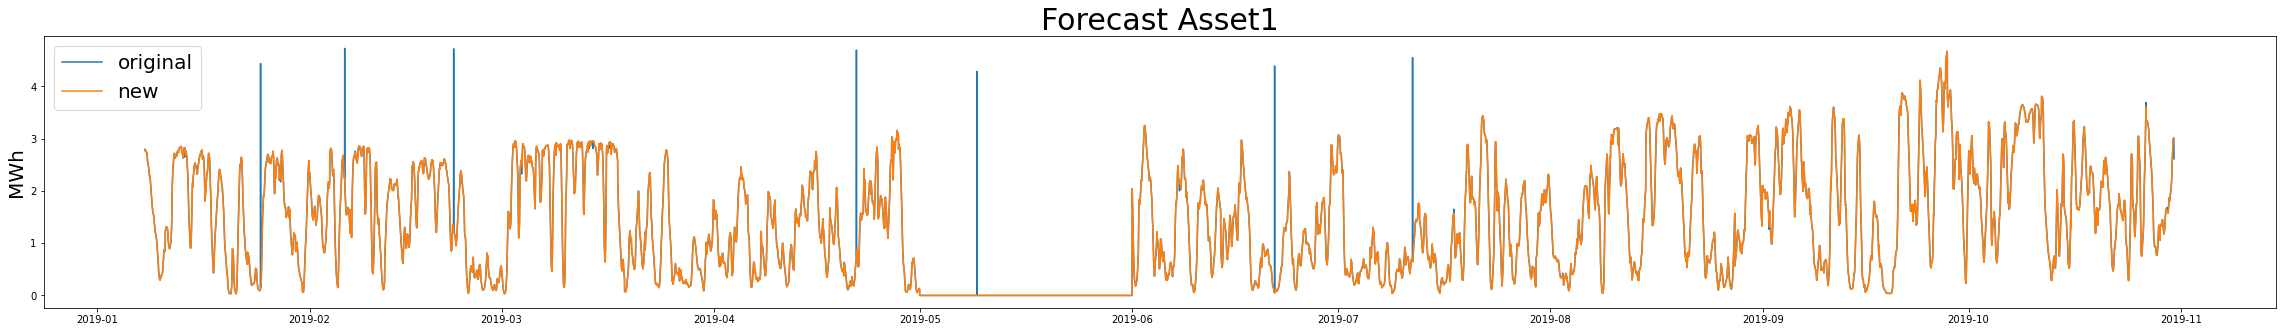

Text(0, 0.5, 'MWh')

Text(0.5, 1.0, 'Forecast Asset2')

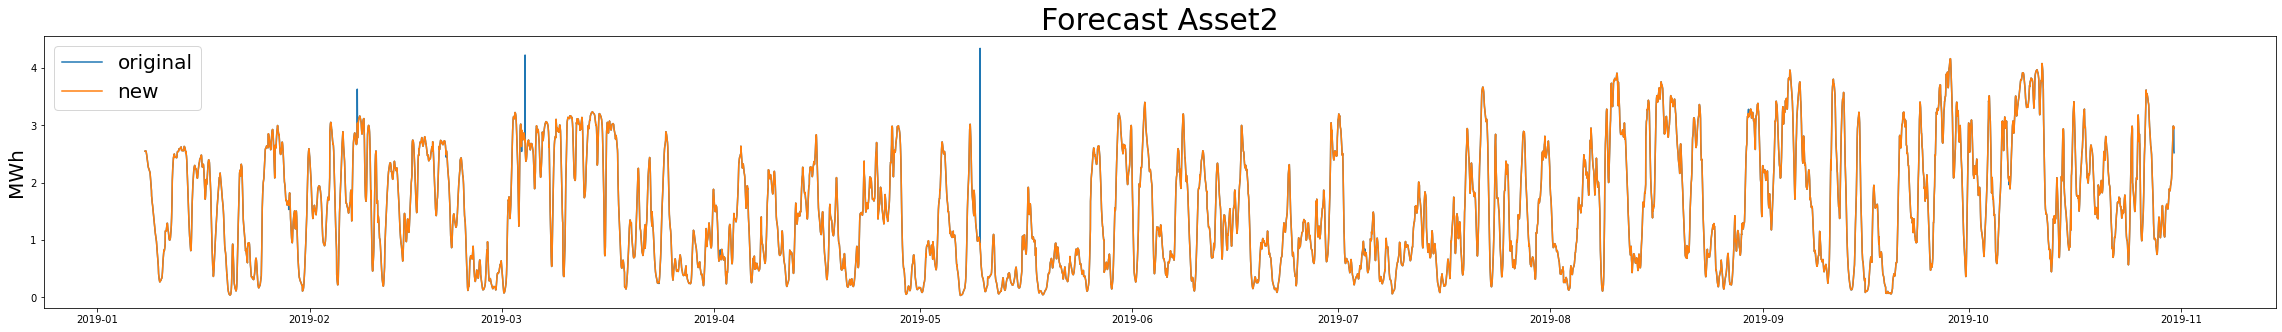

In [12]:
# replace outliers
from hampel import hampel

# for asset0
out0 = hampel(forec0, window_size=4, n=3, imputation=True);
plt.plot(forec0, label = "original")
plt.plot(out0, label = "new")
plt.legend(fontsize = 20)
plt.ylabel("MWh", fontsize=20)
plt.rcParams["figure.figsize"] = (40,5)
plt.title('Forecast Asset0', fontsize=30)
plt.show()
# for asset1
out1 = hampel(forec1, window_size=4, n=3, imputation=True);
plt.plot(forec1, label = "original")
plt.plot(out1, label = "new")
plt.legend(fontsize = 20)
plt.ylabel("MWh", fontsize=20)
plt.rcParams["figure.figsize"] = (40,5)
plt.title('Forecast Asset1', fontsize=30)
plt.show()
# for asset2
out2 = hampel(forec2, window_size=4, n=3, imputation=True);
plt.plot(forec2, label = "original")
plt.plot(out2, label = "new")
plt.legend(fontsize = 20)
plt.ylabel("MWh", fontsize=20)
plt.rcParams["figure.figsize"] = (40,5)
plt.title('Forecast Asset2', fontsize=30)
plt.show()

Text(0, 0.5, 'MWh')

Text(0.5, 1.0, 'Forecast All Assets')

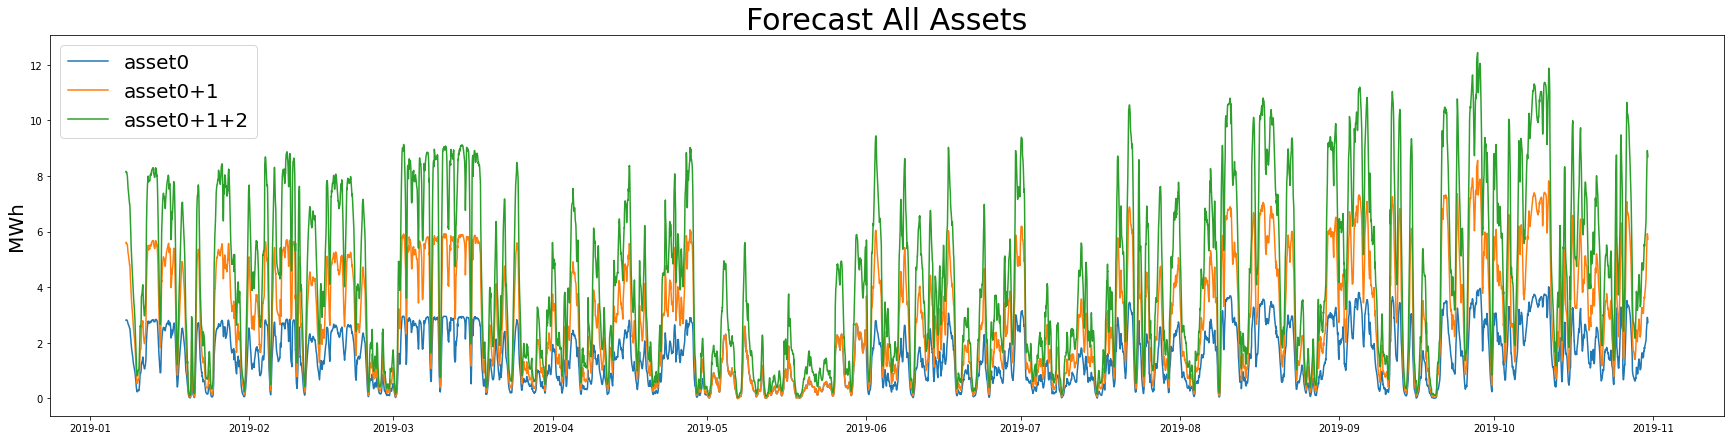

Text(0, 0.5, 'MWh')

Text(0.5, 1.0, 'Forecast All Assets')

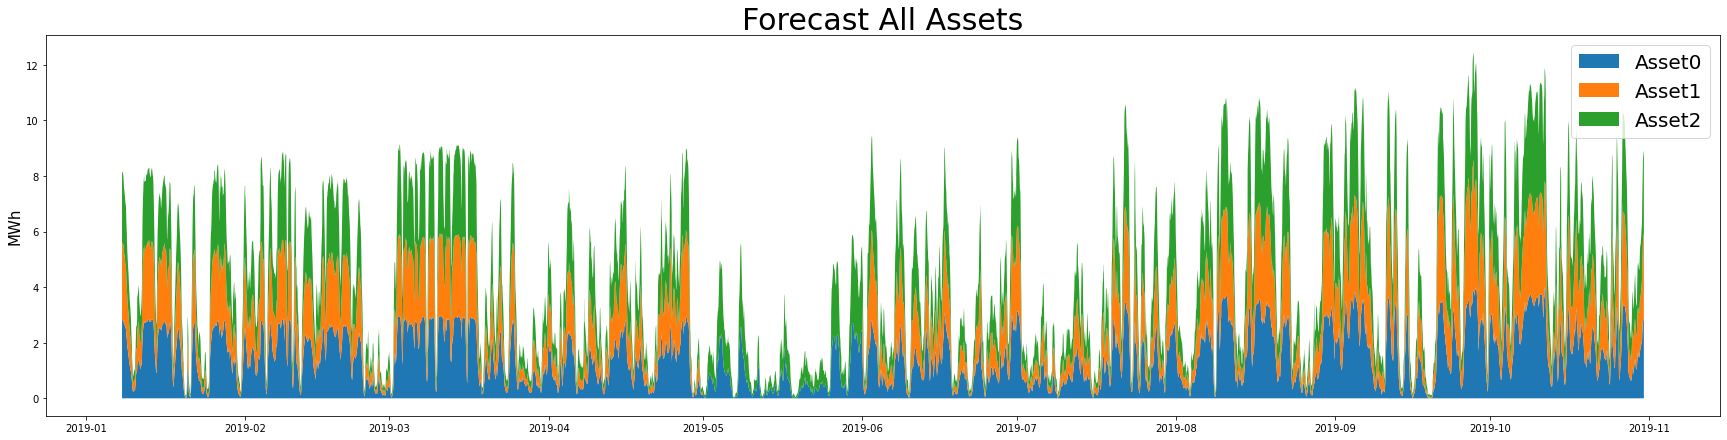

In [15]:
# plot all asset's forecasts
plt.plot(out0, label="asset0")
plt.plot(out0 + out1, label="asset0+1")
plt.plot(out0 + out1 + out2, label="asset0+1+2")
plt.rcParams["figure.figsize"] = (30,7)
plt.ylabel("MWh", fontsize=20)
plt.legend(fontsize=20)
plt.title('Forecast All Assets', fontsize=30)
plt.show()

#stackplot
ax1 = plt.stackplot(df.index, out0, out1, out2, labels=["Asset0","Asset1","Asset2"]) 
plt.rcParams["figure.figsize"] = (30,7)
plt.ylabel("MWh", fontsize=15)
plt.legend(fontsize=20)
plt.title('Forecast All Assets', fontsize=30)
plt.show()

Forecast Asset0 Weekly Mean = 1.469271700172368
Forecast Asset1 Weekly Mean = 1.3833145410871226
Forecast Asset2 Weekly Mean = 1.5576364505012013
Forecasted Portfolio Weekly Mean = 4.410222691760692
Production Asset0 Weekly Mean = 1.481354855360401


Text(0, 0.5, 'MWh')

Text(0.5, 1.0, 'Forecasted and Actual Production Asset0')

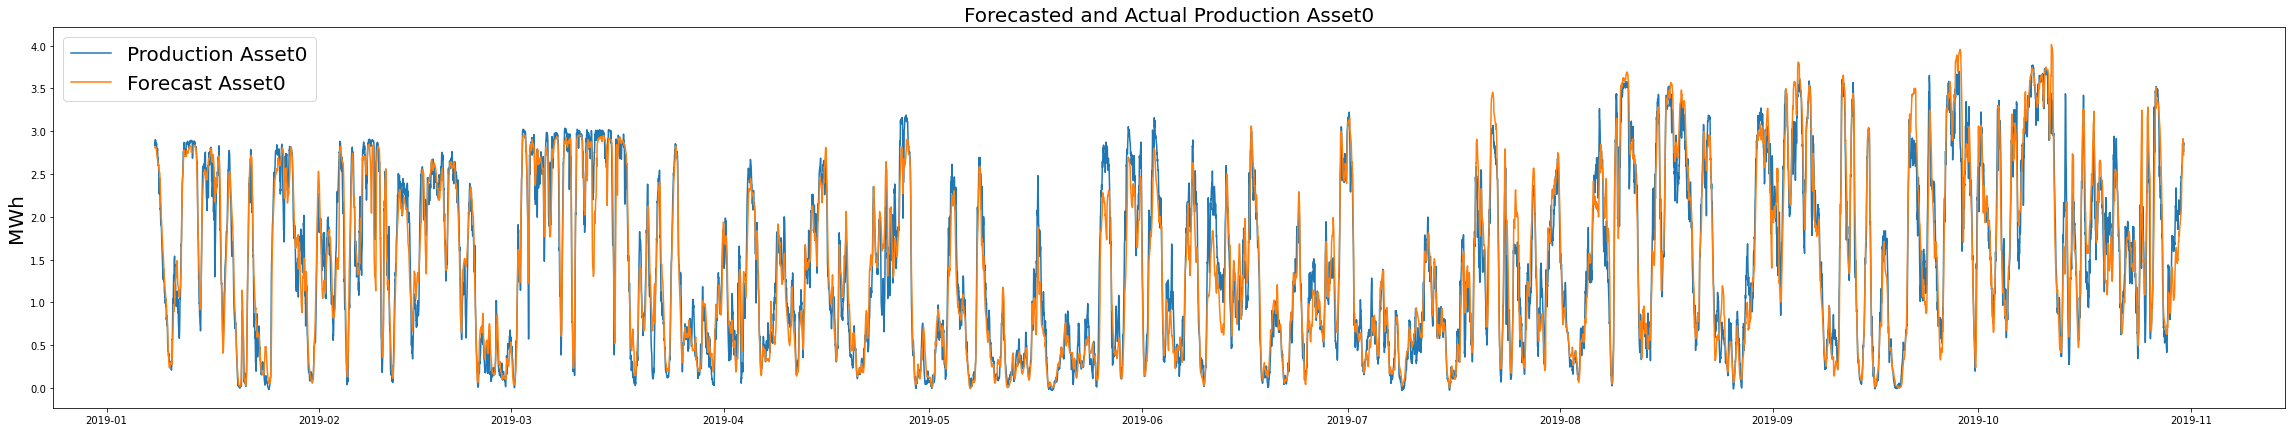

Text(0.5, 1.0, 'Error Ratio')

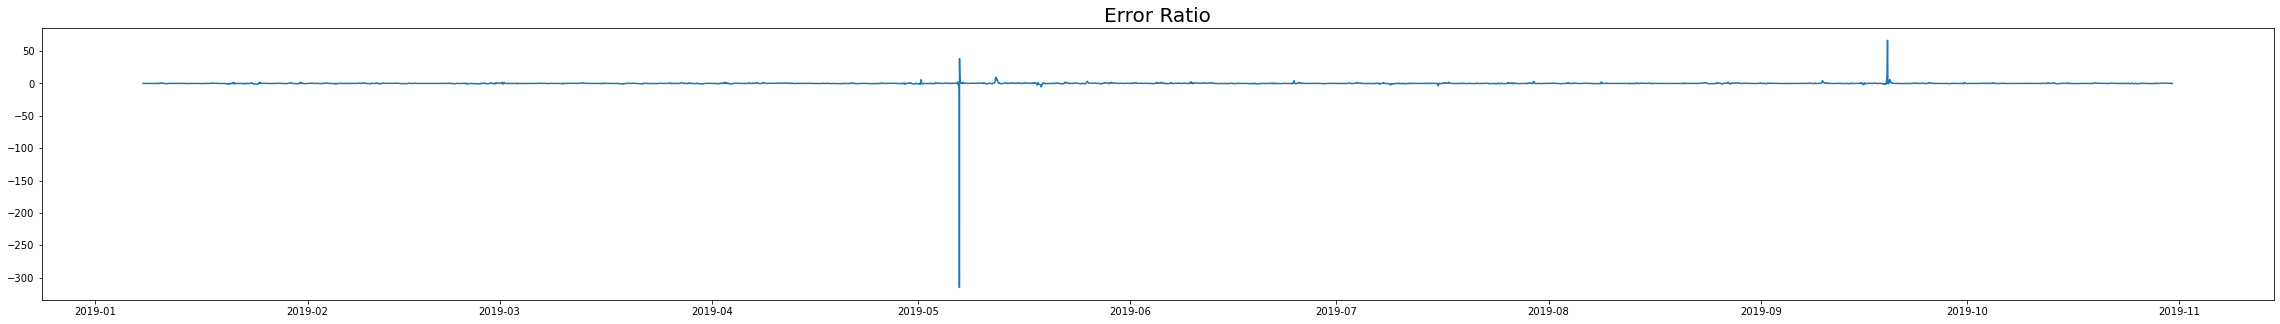

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.4201e+04, 5.0000e+00]),
 array([-315.17640414, -277.00703306, -238.83766197, -200.66829089,
        -162.49891981, -124.32954872,  -86.16017764,  -47.99080656,
          -9.82143547,   28.34793561,   66.51730669]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'MWh')

Text(0.5, 1.0, 'Error Ratio')

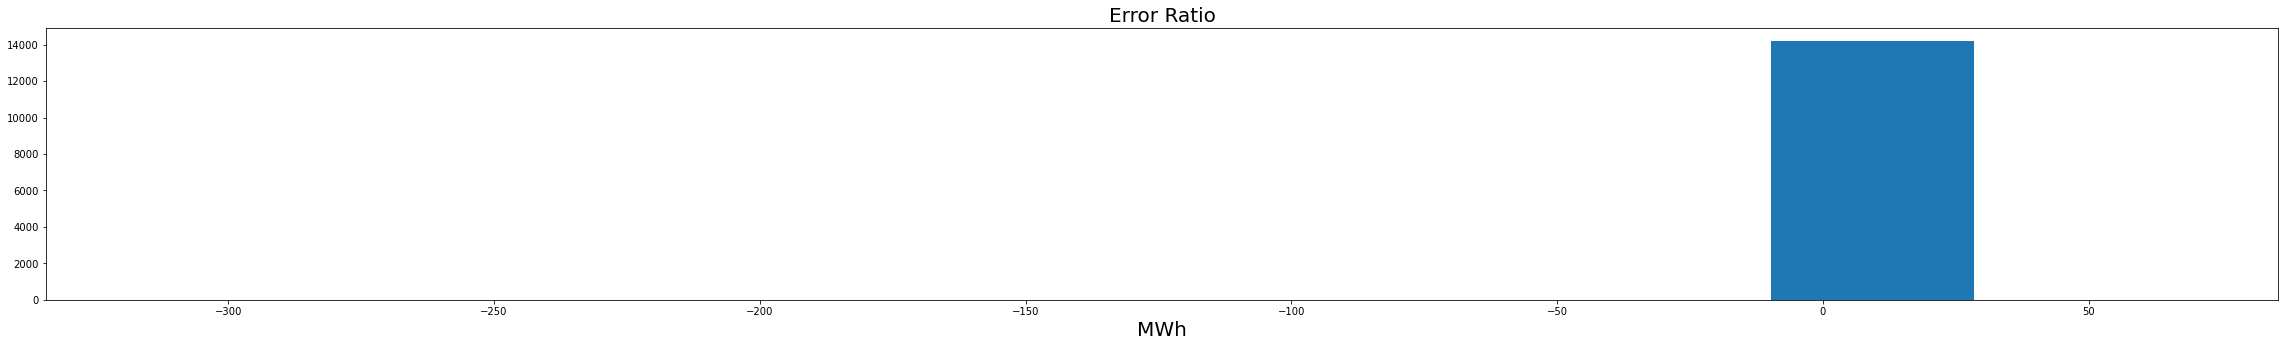

Text(0.5, 1.0, 'Error Ratio Adjusted')

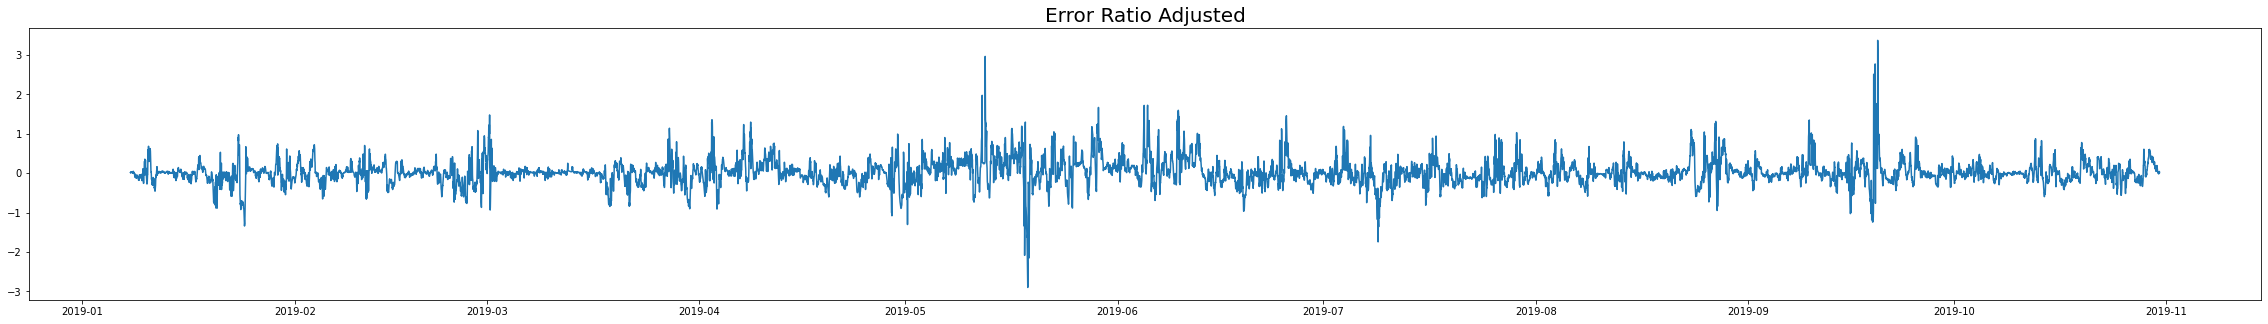

(array([5.0000e+00, 5.0000e+00, 3.4000e+01, 8.2500e+02, 1.1037e+04,
        2.0800e+03, 2.0300e+02, 1.4000e+01, 1.0000e+00, 4.0000e+00]),
 array([-2.90072054, -2.27368112, -1.6466417 , -1.01960228, -0.39256286,
         0.23447656,  0.86151598,  1.4885554 ,  2.11559482,  2.74263424,
         3.36967366]),
 <BarContainer object of 10 artists>)

Text(0.5, 1.0, 'Error Ratio Adjusted')

Text(0.5, 0, 'MWh')

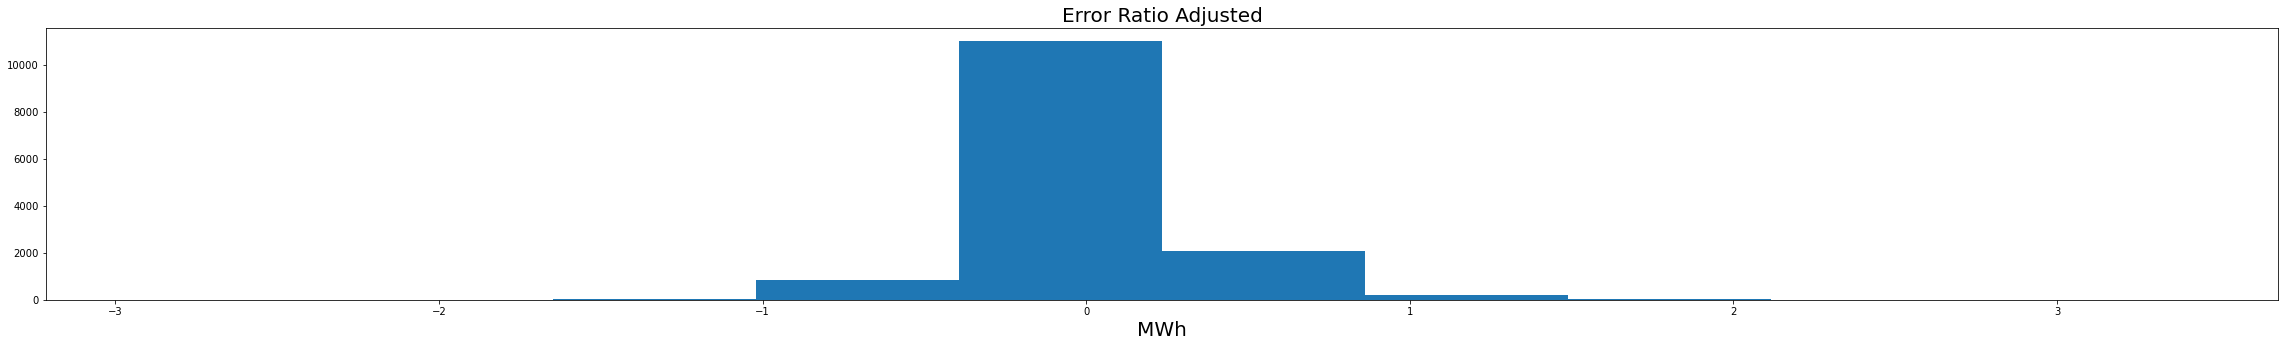

Text(0, 0.5, 'MWh')

Text(0.5, 1.0, 'Forecasted and Actual Estimated Production Asset1')

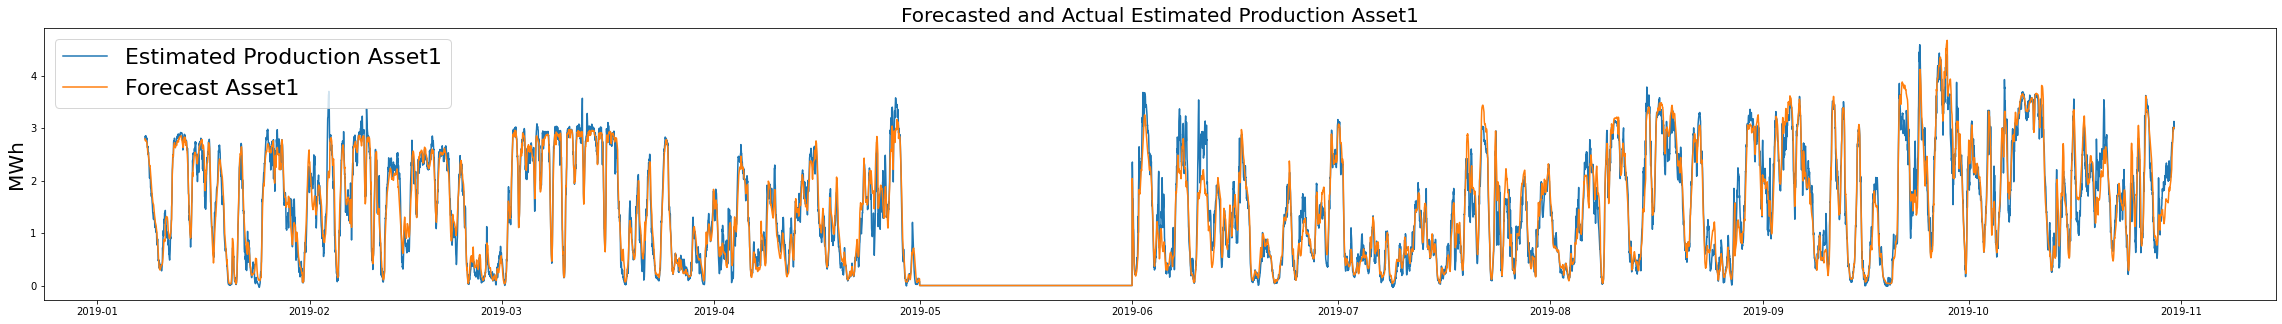

Text(0, 0.5, 'MWh')

Text(0.5, 1.0, 'Forecasted and Actual Production Asset2')

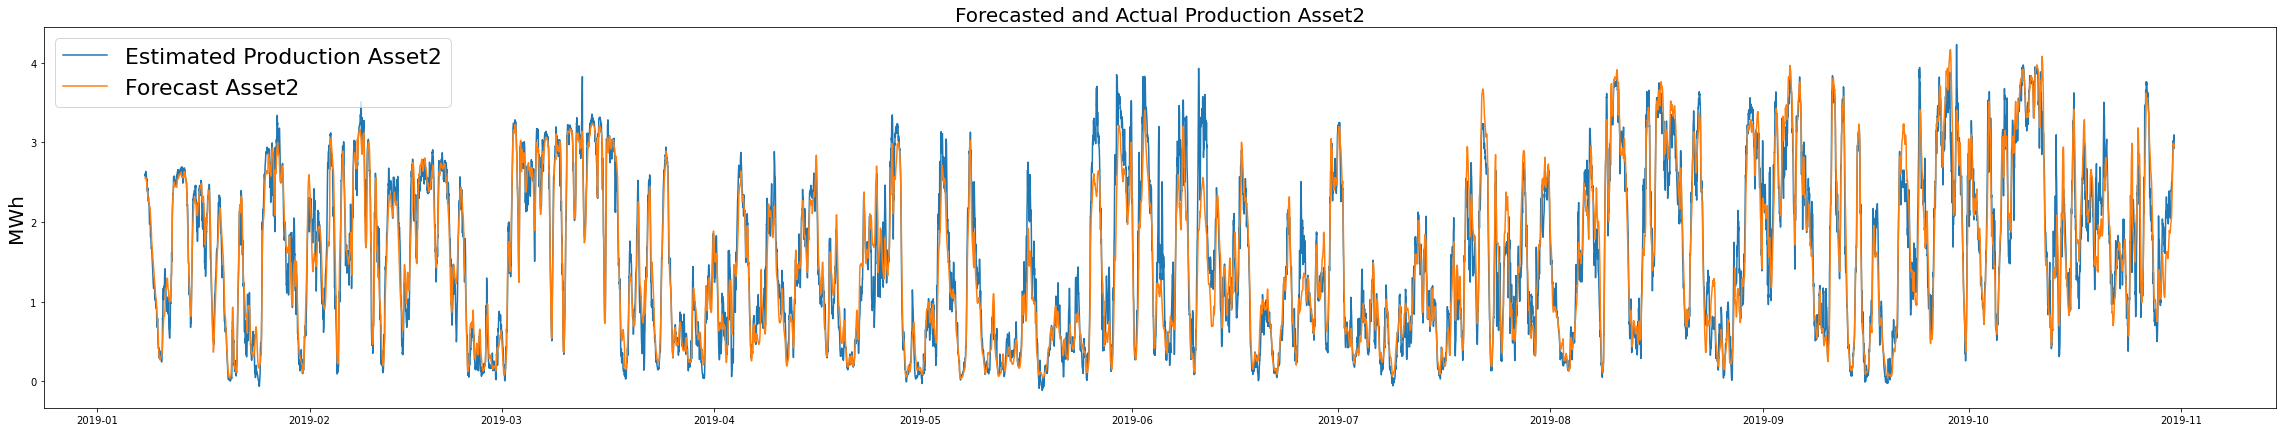

Text(0, 0.5, 'MWh')

Text(0.5, 1.0, 'Forecasted and Actual Estimated Production of Portfolio')

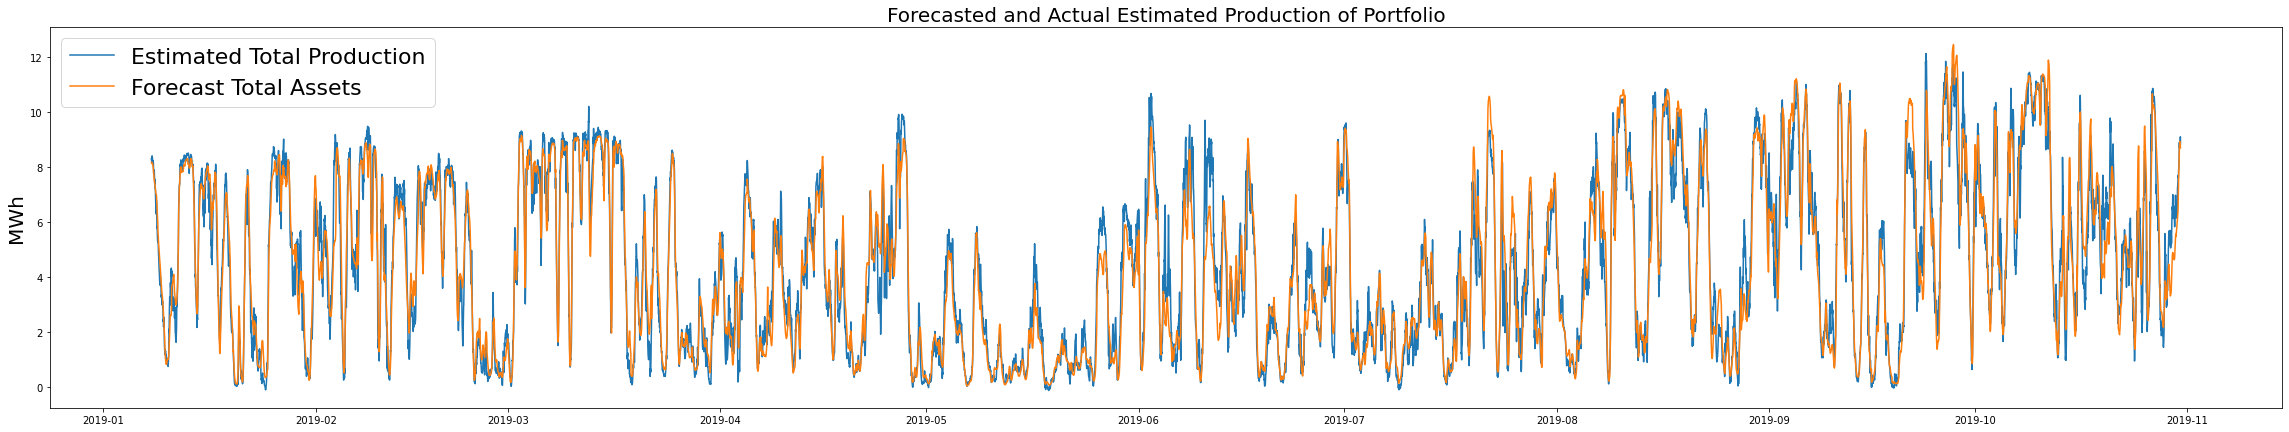

Production Asset1 Weekly Mean = 1.3866685983387967
Production Asset2 Weekly Mean = 1.5791817160362036
Portfolio Production Weekly Mean = 4.425659904200401


<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'Forecast Weekly Mean')

Text(0, 0.5, 'MWh')

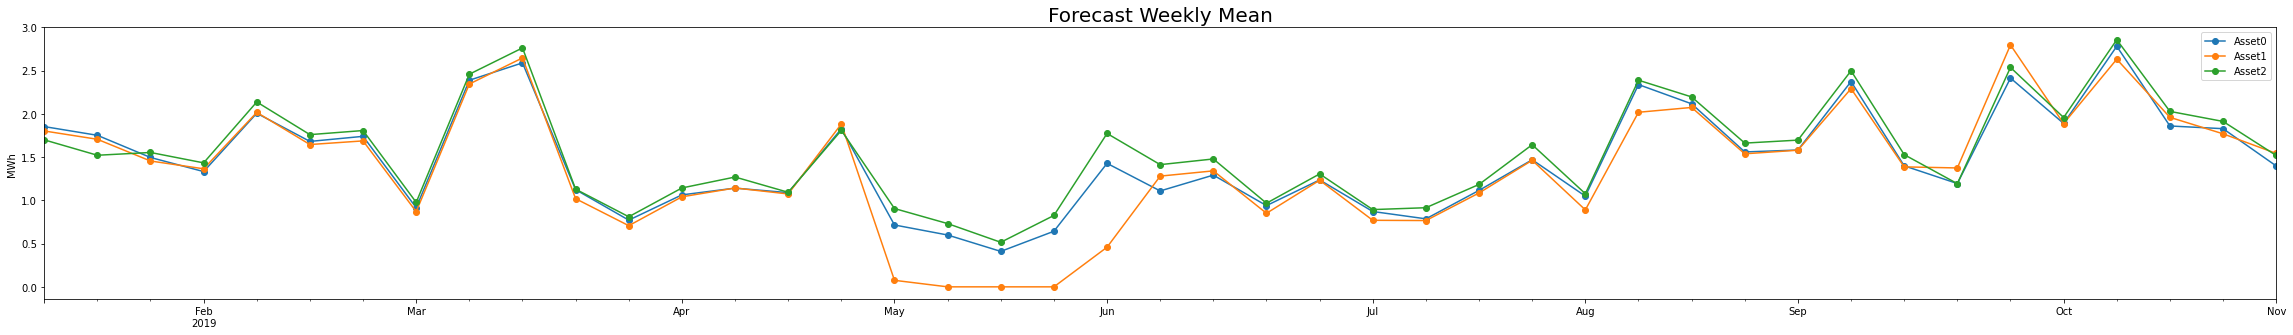

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'Estimated Production Weekly Mean')

Text(0, 0.5, 'MWh')

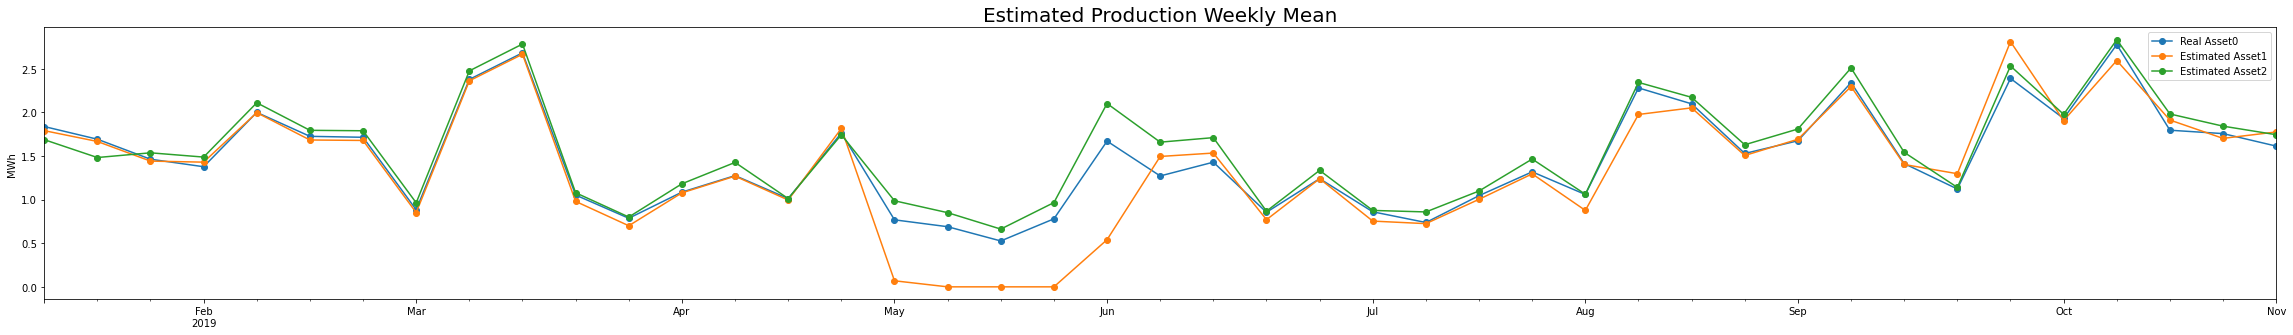

<AxesSubplot:>

<AxesSubplot:>

Text(0.5, 1.0, 'Forecasted Portfolio Weekly Mean and Actual Production')

Text(0, 0.5, 'MWh')

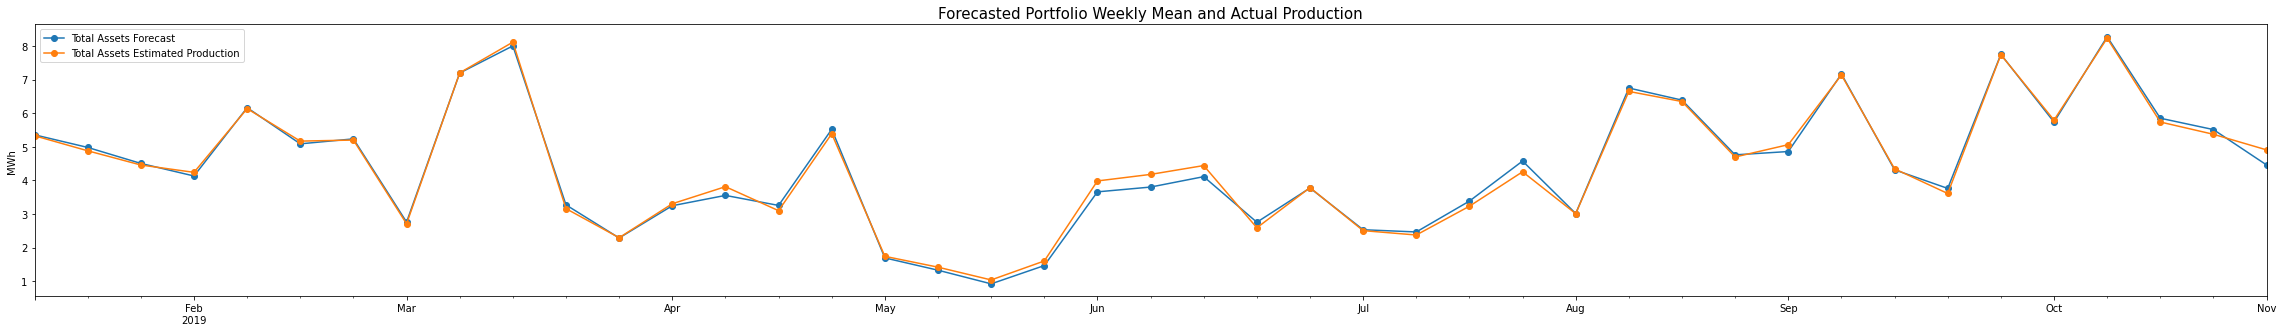

In [17]:
# weekly mean values forecasts
out0mean = out0.resample("W").mean()
print("Forecast Asset0 Weekly Mean =", out0mean.mean())
out1mean = out1.resample("W").mean()
print("Forecast Asset1 Weekly Mean =", out1mean.mean())
out2mean = out2.resample("W").mean()
print("Forecast Asset2 Weekly Mean =", out2mean.mean())
# Sum of forecasts weekly mean values 
outtotmean = out0mean + out1mean + out2mean
print("Forecasted Portfolio Weekly Mean =", outtotmean.mean())

#weekly mean values actual production
actual0mean= new_df['actual0'].resample("W").mean()
print("Production Asset0 Weekly Mean =", actual0mean.mean())

#plot actual and forecast
plt.plot(ac, label = "Production Asset0")
plt.plot(out0, label = "Forecast Asset0")
plt.rcParams["figure.figsize"] = (40,5)
plt.ylabel("MWh", fontsize=20)
plt.legend(fontsize=20)
plt.title('Forecasted and Actual Production Asset0', fontsize=20)
plt.show()

#calculate forecast error ratio across time 
raw_error_ratio = (new_df['actual0'] - out0)/out0
#plot error 
plt.plot(raw_error_ratio)
plt.title('Error Ratio', fontsize=20)
plt.show()
#histogram error
plt.hist(raw_error_ratio)
plt.xlabel("MWh", fontsize = 20)
plt.title('Error Ratio', fontsize=20)
plt.show()


#replace error outliers
error_ratio = hampel(raw_error_ratio, window_size=50, n=3, imputation=True);
#plot error cleaned
plt.plot(error_ratio)
plt.title('Error Ratio Adjusted', fontsize=20)
plt.show()
#histogram cleaned
plt.hist(error_ratio)
plt.title('Error Ratio Adjusted', fontsize=20)
plt.xlabel("MWh", fontsize = 20)
plt.show()

# With More Time..:

#estimate actual1 and actual2 productions assuming same forecast error as actual0
actual1 = out1 + out1*error_ratio
plt.plot(actual1, label = 'Estimated Production Asset1')
plt.plot(out1, label = 'Forecast Asset1')
plt.rcParams["figure.figsize"] = (40,7)
plt.ylabel("MWh", fontsize=20)
plt.legend(fontsize=22)
plt.title('Forecasted and Actual Estimated Production Asset1', fontsize=20)
plt.show()

actual2 = out2 + out2*error_ratio
plt.plot(actual2, label = 'Estimated Production Asset2')
plt.plot(out2, label = 'Forecast Asset2')
plt.rcParams["figure.figsize"] = (40,7)
plt.ylabel("MWh", fontsize=20)
plt.legend(fontsize=22)
plt.title('Forecasted and Actual Production Asset2', fontsize=20)
plt.show()

#estimate total portfolio production assuming same forecast error as actual0
actual_tot = new_df["actual0"] + actual1 + actual2
out_tot = out0 + out1 + out2
plt.plot(actual_tot, label = 'Estimated Total Production')
plt.plot(out_tot, label = 'Forecast Total Assets')
plt.rcParams["figure.figsize"] = (40,7)
plt.ylabel("MWh", fontsize=20)
plt.legend(fontsize=22)
plt.title('Forecasted and Actual Estimated Production of Portfolio', fontsize=20)
plt.show()

#weekly mean values actual production
actual1mean = actual1.resample("W").mean()
print("Production Asset1 Weekly Mean =", actual1mean.mean())
actual2mean = actual2.resample("W").mean()
print("Production Asset2 Weekly Mean =", actual2mean.mean())
# Sum of weekly mean values acutal production
actual_tot_mean = actual0mean + actual1mean + out2mean
print("Portfolio Production Weekly Mean =", actual_tot_mean.mean())


# weekly mean forecast plot
out0.resample("W").mean().plot(style="-o", figsize=(40, 5), label = "Asset0");
out1.resample("W").mean().plot(style="-o", figsize=(40, 5), label = "Asset1");
out2.resample("W").mean().plot(style="-o", figsize=(40, 5), label = "Asset2");
plt.title('Forecast Weekly Mean', fontsize=20)
plt.ylabel('MWh')
plt.legend(fontsize=10)
plt.show()

# weekly mean estimated production plot
new_df["actual0"].resample("W").mean().plot(style="-o", figsize=(40, 5), label = "Real Asset0");
actual1.resample("W").mean().plot(style="-o", figsize=(40, 5), label = "Estimated Asset1");
actual2.resample("W").mean().plot(style="-o", figsize=(40, 5), label = "Estimated Asset2");
plt.title('Estimated Production Weekly Mean', fontsize=20)
plt.ylabel('MWh')
plt.legend(fontsize=10)
plt.show()

#plot weekly mean Portfolio
outtotmean.plot(style="-o", figsize=(40, 5), label = "Total Assets Forecast")
actual_tot_mean.plot(style="-o", figsize=(40, 5), label = "Total Assets Estimated Production")
plt.title('Forecasted Portfolio Weekly Mean and Actual Production', fontsize=15)
plt.ylabel('MWh')
plt.legend()
plt.show()


Scheduled 20870.62553738092
Delivered 21004.603640127665
Imbalance0 133.97810274685486
Imbalance Ratio = 2019-01-08 00:00:00+00:00    0.015960
2019-01-08 00:30:00+00:00    0.019910
2019-01-08 01:00:00+00:00    0.009112
2019-01-08 01:30:00+00:00    0.022770
2019-01-08 02:00:00+00:00    0.021455
                               ...   
2019-10-30 21:30:00+00:00    0.000803
2019-10-30 22:00:00+00:00    0.006817
2019-10-30 22:30:00+00:00   -0.006347
2019-10-30 23:00:00+00:00    0.042814
2019-10-30 23:30:00+00:00    0.015461
Freq: <pandas._libs.properties.CachedProperty object at 0x00000259D1593F00>, Length: 14208, dtype: float64
Imbalance1 = 123.17484264288365
Imbalance2 = 435.3154304721652
Total Imbalance = 692.4683758619037


array([[0.99989429, 0.98308389],
       [0.98308389, 1.11064276]])

array([[0.99989429, 0.98298026],
       [0.98298026, 0.99999241]])

Pearsons correlation: 0.933
Pearsons correlation: 0.983


Text(0.5, 0, 'MWh')

Text(0, 0.5, 'MWh')

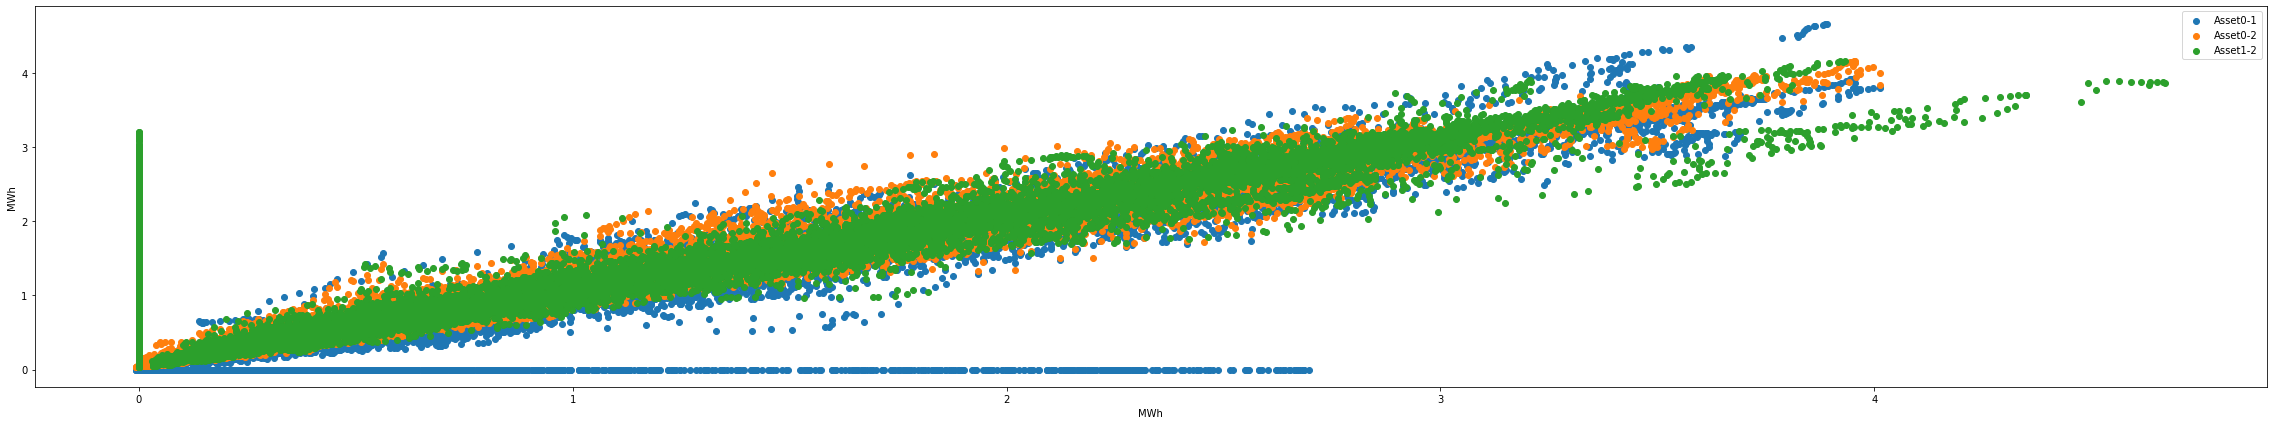

In [18]:
#(With More Time)
#calculate MWh scheduled
scheduled = sum(out0)
print("Scheduled", scheduled)

#calculate MWh delivered
delivered = sum(new_df["actual0"])
print("Delivered", delivered)

#calculate MWh imbalance (if positive means that overall there is surplus)
imbalance = sum(new_df["actual0"]-out0)
print("Imbalance0", imbalance)

#calculate imbalance as percentage of forecast
imbalance_ratio = (new_df["actual0"]-out0)/out0
print("Imbalance Ratio =", imbalance_ratio)

#estimate imbalance of asset 1 and 2
imbalance1 = sum(out1*imbalance_ratio)
print("Imbalance1 =", imbalance1)
imbalance2 = sum(out2*imbalance_ratio)
print("Imbalance2 =", imbalance2)

imbalance_tot = imbalance + imbalance1 + imbalance2
print("Total Imbalance =", imbalance_tot)


from numpy import cov
#calculate covariance between forecasts
cov(out0, out1)
cov(out0, out2)

from scipy.stats import pearsonr
#calculate pearson coefficient between forecasts
corr, _ = pearsonr(out0, out1)
print('Pearsons correlation: %.3f' % corr)
corr, _ = pearsonr(out0, out2)
print('Pearsons correlation: %.3f' % corr)


#scatterplot for correlation check
plt.scatter(out0, out1, label='Asset0-1')
plt.scatter(out0, out2, label='Asset0-2')
plt.scatter(out1, out2, label='Asset1-2')
plt.xlabel("MWh", fontsize = 10)
plt.ylabel("MWh", fontsize = 10)
plt.rcParams["figure.figsize"] = (5,5)
plt.legend()
plt.show()

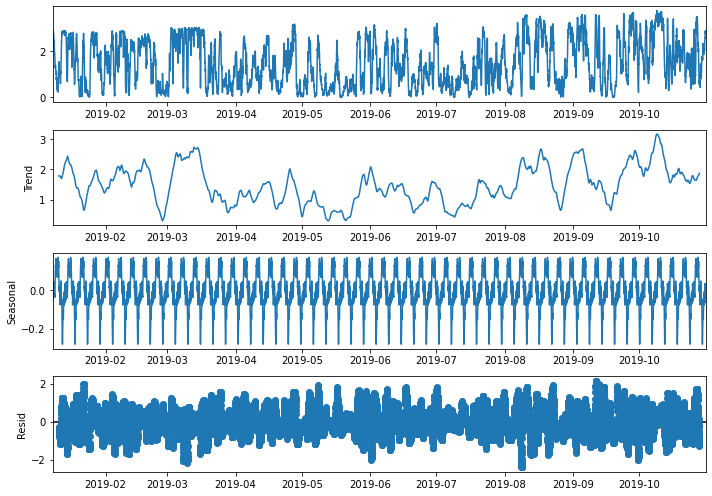

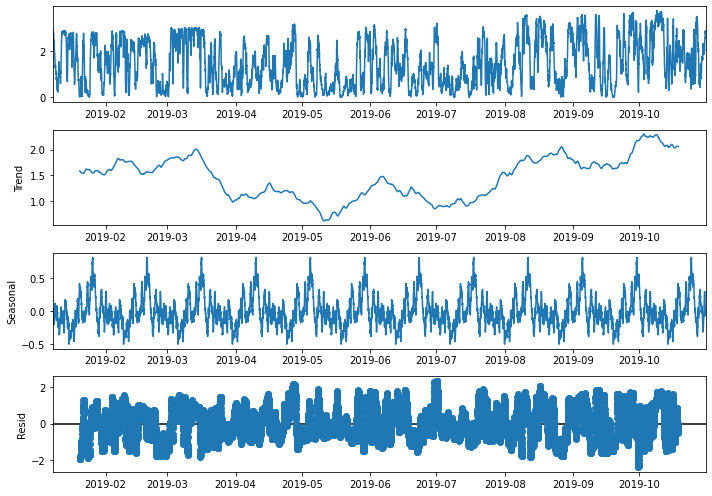

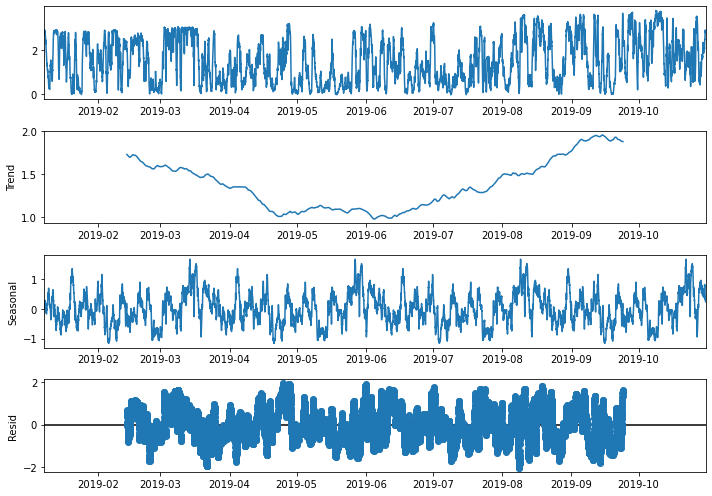

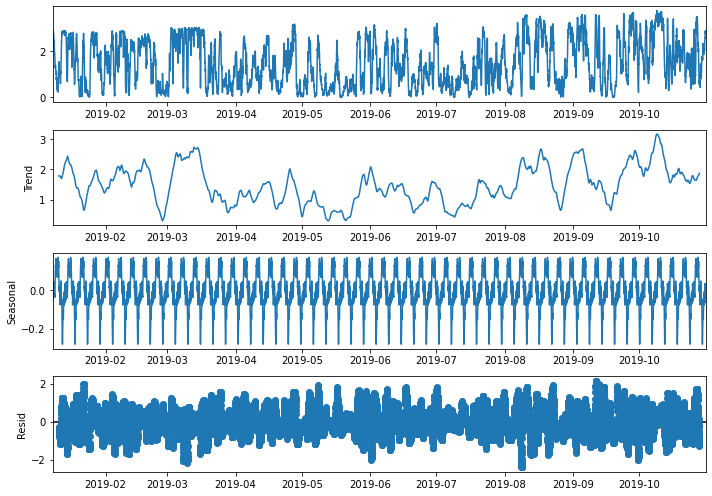

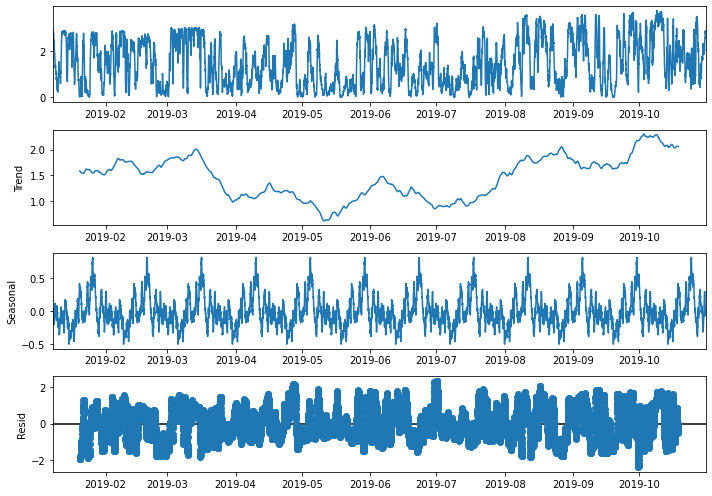

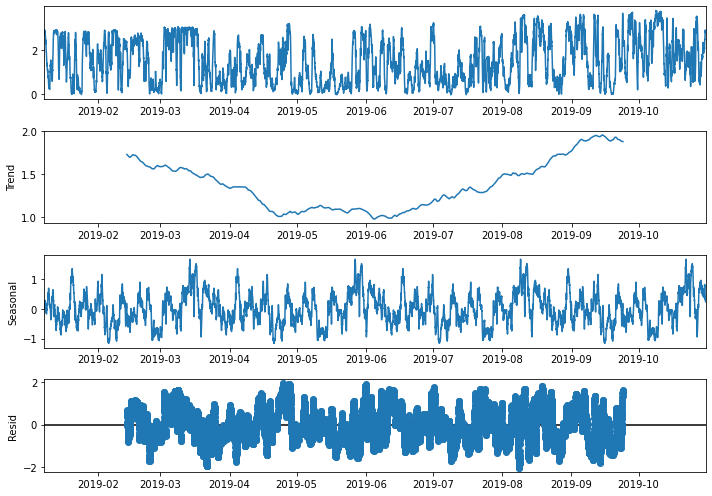

In [29]:
#(With more time:)
from statsmodels.tsa.seasonal import seasonal_decompose
# seasonality on weekly scale
sd = seasonal_decompose(ac, period=(14208//52))
sd.plot()
# seasonality on a monthly scale
sd = seasonal_decompose(ac, period=(14208//12))
sd.plot()
#seasonality on a quarterly scale
sd = seasonal_decompose(ac, period=(14208//4))
sd.plot()

0         1         2  ForecastTot  \
2019-01-08 00:00:00+00:00  2.812544  2.795029  2.550405     8.157978   
2019-01-08 00:30:00+00:00  2.812544  2.778668  2.550405     8.141617   
2019-01-08 01:00:00+00:00  2.806959  2.761620  2.550405     8.118984   
2019-01-08 01:30:00+00:00  2.810723  2.762358  2.552570     8.125652   
2019-01-08 02:00:00+00:00  2.814365  2.775047  2.554735     8.144147   
...                             ...       ...       ...          ...   
2019-10-30 21:30:00+00:00  2.890639  3.014153  2.977999     8.882791   
2019-10-30 22:00:00+00:00  2.868277  3.010624  2.962844     8.841745   
2019-10-30 22:30:00+00:00  2.855856  3.001157  2.941193     8.798206   
2019-10-30 23:00:00+00:00  2.747903  2.998018  2.966632     8.712554   
2019-10-30 23:30:00+00:00  2.725645  2.998018  2.966632     8.690295   

                            actual0   actual1   actual2  ProductionTot  
2019-01-08 00:00:00+00:00  2.857432  2.839638  2.591110       8.288180  
2019-01-08 00:30:00+00:00  2.868542  2.833991  2.601184       8.303717  
2019-01-08 01:00:00+00:00  2.832536  2.786783  2.573644       8.192962  
2019-01-08 01:30:00+00:00  2.874722  2.825256  2.610692       8.310670  
2019-01-08 02:00:00+00:00  2.874747  2.834586  2.609548       8.318881  
...                             ...       ...       ...            ...  
2019-10-30 21:30:00+00:00  2.892960  3.016574  2.980390       8.889924  
2019-10-30 22:00:00+00:00  2.887829  3.031147  2.983040       8.902016  
2019-10-30 22:30:00+00:00  2.837730  2.982108  2.922526       8.742364  
2019-10-30 23:00:00+00:00  2.865553  3.126376  3.093647       9.085576  
2019-10-30 23:30:00+00:00  2.767785  3.044369  3.012499       8.824654  

[14208 rows x 8 columns]

<AxesSubplot:>

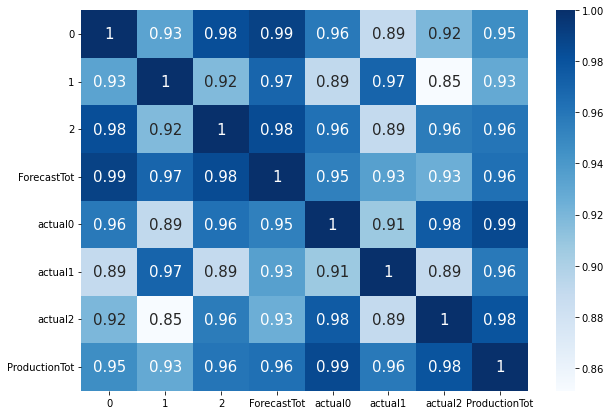

In [23]:
# With more time..:

# forecast 0,1,2 sum dataframe
out_tot = out0 + out1 + out2
new_out_tot = pd.DataFrame(out_tot, index=df.index)
new_out_tot.columns = ['ForecastTot']

#new dataframes
new_out0 = pd.DataFrame(out0, index=df.index)
new_out1 = pd.DataFrame(out1, index=df.index)
new_out2 = pd.DataFrame(out2, index=df.index)

new_ac = pd.DataFrame(ac, index=df.index)
new_ac.columns = ['actual0']
new_actual1 = pd.DataFrame(actual1, index=df.index)
new_actual1.columns = ['actual1']
new_actual2 = pd.DataFrame(actual2, index=df.index)
new_actual2.columns = ['actual2']

# Production 0,1,2 sum dataframe
prod_tot = new_ac['actual0'] + actual1 + actual2
new_prod_tot = pd.DataFrame(prod_tot, index=df.index)
new_prod_tot.columns = ['ProductionTot']

#new dataframe
pre_df = new_out0.join(new_out1)
new_df = pre_df.join(new_out2)
tot_new_df = new_df.join(new_out_tot)
ac_tot_new_df = tot_new_df.join(new_ac)
new = ac_tot_new_df.join(new_actual1)
final1 = new.join(new_actual2)
final = final1.join(new_prod_tot)
final

#correlation heatmap
corr = final.corr()
sb.heatmap(corr, cmap="Blues", annot=True, annot_kws={'size': 15})
plt.rcParams["figure.figsize"] = (10,7)